Kết nối Colab với Google Drive để lấy dữ liệu

Cài đặt thư viện Gensim cho việc train model Word2Vec

In [2]:
!pip install gensim

Import các thư viện cần thiết

In [3]:
import os
import re
import pandas as pd
import string
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load tập dữ liệu từ thư mục trong Google Drive

In [4]:
# Load data
def load_data(csv_file):
    return pd.read_csv(csv_file, nrows = 5000)

train_data = load_data("./Fixed_news_dataset.csv")

train_data = train_data["title"].to_list()
# train_data = "\n".join(train_data)
with open("/content/vietnamese-stopwords.txt", 'r', encoding='utf-8') as file:
    lines = [line.strip() for line in file]
stopwords_list= lines

def clean_data(w):
    w = w.lower()
    w = re.sub("[^a-zàáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵ]", " ", w)
    words = w.split()
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words)


def get_inp(list_sent):
    sent=list(map(clean_data, list_sent))
    sent=list(map(lambda x: x.split(" "), sent))
    return sent

# print(train_data[:1000])
inp_data=get_inp(train_data)
print(inp_data[:5])

[['cướp', 'tiệm', 'vàng', 'huế', 'đại', 'công', 'công', 'tác', 'trại', 'giam'], ['mạng', 'nga', 'tiến', 'thẳng'], ['địa', 'phương', 'đứng', 'đầu', 'tổng', 'môn', 'văn', 'toán', 'ngoại', 'ngữ'], ['chết', 'mưa', 'nghìn'], ['hải', 'phòng', 'hình', 'ảnh', 'điên', 'tai', 'nạn', 'liên', 'hoàn', 'phố', 'tam', 'bạc']]


Train model Word2Vec. Trong quá trình train, có bạn có thể chỉnh sử dụng GPU của Colab để đẩy nhanh tiến độ bằng cách vào Rumtime => Change Runtime Type và chọn GPU

In [7]:
# Skipgram model
model = Word2Vec(inp_data, min_count = 1, vector_size = 256, window = 3, sg = 1)
model.build_vocab(inp_data, update=True)

model.train(inp_data, total_examples=model.corpus_count, epochs=500)
model.wv.save('word2vec_skipgram.bin')


# CBOW model
model = Word2Vec(inp_data, min_count = 1, vector_size = 256, window = 3, sg = 1)
model.build_vocab(inp_data, update=True)

model.train(inp_data, total_examples=model.corpus_count, epochs=500)
model.wv.save('word2vec_CBOW.bin')


Sau khi có model. Ta tiến hành load mô hình

In [8]:
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from scipy.spatial import distance
path = 'word2vec_CBOW.bin'
model = gensim.models.KeyedVectors.load(path)

In [14]:
with open("vocab.txt", "w", encoding="utf-8") as f:
    for x in model.index_to_key:
        f.write(x + "\n")

Test kết quả

In [23]:
model.most_similar(positive=['virus'], topn=10)

[('herpes', 0.8795763254165649),
 ('ncov', 0.8067818880081177),
 ('sars', 0.7568636536598206),
 ('cov', 0.7310959100723267),
 ('rajapaksa', 0.6111584305763245),
 ('rover', 0.6074762344360352),
 ('gôn', 0.5993297696113586),
 ('bún', 0.5946267247200012),
 ('vaccine', 0.5913262367248535),
 ('thiểu', 0.5906464457511902)]

In [35]:
model.most_similar(positive=['bóng'], topn=10)


[('pokal', 0.5452207922935486),
 ('braunschweig', 0.47439783811569214),
 ('hertha', 0.47150734066963196),
 ('newcastle', 0.47109949588775635),
 ('ajax', 0.4688425064086914),
 ('berlin', 0.46762755513191223),
 ('mainz', 0.46336111426353455),
 ('dfb', 0.46275150775909424),
 ('bull', 0.4608810544013977),
 ('offenbach', 0.4586392343044281)]

In [36]:
model.most_similar(positive=['việt'], topn=10)


[('nam', 0.4800739884376526),
 ('ubs', 0.36700719594955444),
 ('prulink', 0.3644009530544281),
 ('hyundai', 0.3553015887737274),
 ('prudential', 0.3501327931880951),
 ('takeuchi', 0.34814009070396423),
 ('olympiad', 0.3408144414424896),
 ('myanmar', 0.3396409749984741),
 ('akira', 0.33926472067832947),
 ('elantra', 0.3362051546573639)]

In [37]:
model.most_similar(positive=['covid'], topn=10)

[('cases', 0.6201484799385071),
 ('july', 0.6154992580413818),
 ('logs', 0.6007995009422302),
 ('omicron', 0.5677236914634705),
 ('following', 0.5368170142173767),
 ('ncov', 0.5361972451210022),
 ('vắc', 0.47874879837036133),
 ('ramos', 0.47583478689193726),
 ('growth', 0.47491970658302307),
 ('paxlovid', 0.45815160870552063)]

In [38]:
model.most_similar(positive=['vắc'], topn=10)

[('mũi', 0.6658766865730286),
 ('tiêm', 0.6328021287918091),
 ('gripen', 0.5777154564857483),
 ('vaccine', 0.5648882985115051),
 ('july', 0.560602068901062),
 ('syria', 0.5464851260185242),
 ('logs', 0.5421675443649292),
 ('cases', 0.5403475165367126),
 ('jas', 0.5365847945213318),
 ('following', 0.5349777936935425)]

In [46]:
model.most_similar(positive=['giải'], topn=10)

[('roberto', 0.45871442556381226),
 ('lumpur', 0.43554773926734924),
 ('kuala', 0.4310756027698517),
 ('sunshine', 0.4213678538799286),
 ('vợt', 0.41320210695266724),
 ('millions', 0.40565672516822815),
 ('dot', 0.39923396706581116),
 ('agut', 0.3935217261314392),
 ('property', 0.3883104622364044),
 ('thiếc', 0.3793802559375763)]

In [47]:
model.most_similar(positive=['ghi'], topn=10)

[('felix', 0.5210028886795044),
 ('joao', 0.492516428232193),
 ('tâng', 0.4690258800983429),
 ('hazard', 0.4625357687473297),
 ('vinicius', 0.44406965374946594),
 ('dybala', 0.4406522512435913),
 ('southampton', 0.42902418971061707),
 ('sadio', 0.42868855595588684),
 ('solo', 0.42440980672836304),
 ('diallo', 0.40989020466804504)]

In [48]:
model.most_similar(positive=['bàn'], topn=10)

[('joao', 0.5204344987869263),
 ('lyon', 0.5170738697052002),
 ('felix', 0.4912683069705963),
 ('inter', 0.4884074032306671),
 ('parisâ', 0.4481245279312134),
 ('gabriel', 0.4411196708679199),
 ('nantes', 0.44110581278800964),
 ('hat', 0.4377346932888031),
 ('tâng', 0.43666011095046997),
 ('highlights', 0.4360602796077728)]

In [49]:
model.most_similar(positive=['thắng'], topn=10)

[('yokohama', 0.5268906950950623),
 ('los', 0.4916309118270874),
 ('akita', 0.47863322496414185),
 ('buffaloes', 0.47590842843055725),
 ('bamboo', 0.47348296642303467),
 ('dragons', 0.47259974479675293),
 ('nghẹt', 0.47249314188957214),
 ('hacken', 0.47126224637031555),
 ('hanoi', 0.47003358602523804),
 ('blaublitz', 0.46783506870269775)]

In [30]:
word_0 = "virus"
word_1 = "herpes"
word_2 = "ncov"

word_0_eb = model[word_0]
word_1_eb = model[word_1]
word_2_eb = model[word_2]

dst_0_1 = distance.euclidean(word_0_eb, word_1_eb)
dst_1_2 = distance.euclidean(word_1_eb, word_2_eb)
dst_2_0 = distance.euclidean(word_2_eb, word_0_eb)

print("OUTPUT DISTANCE")
print("0 vs 1: ", dst_0_1)
print("1 vs 2: ", dst_1_2)
print("2 vs 0: ", dst_2_0)

OUTPUT DISTANCE
0 vs 1:  4.071761131286621
1 vs 2:  2.4131438732147217
2 vs 0:  4.111104965209961


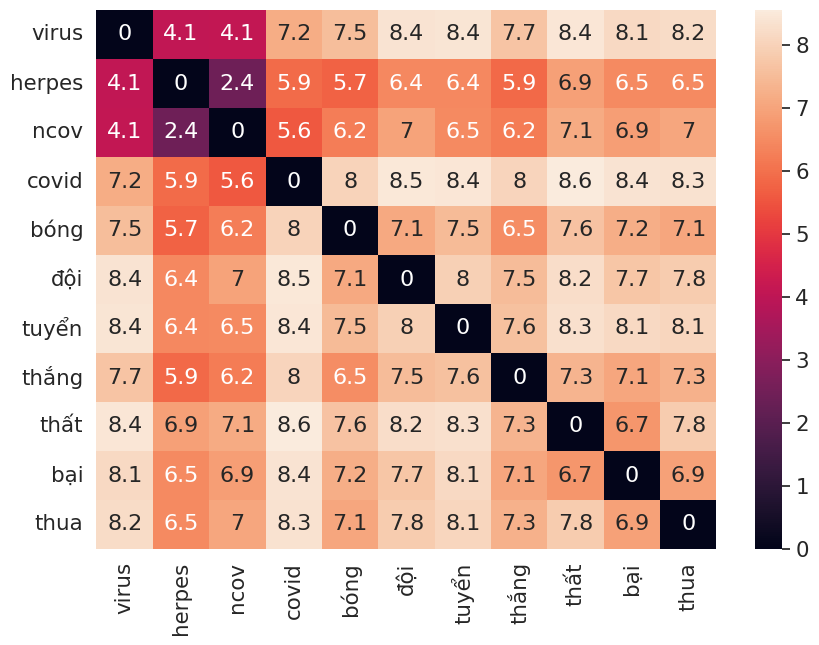

In [34]:
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

list_words = ["virus", "herpes", "ncov", "covid", "bóng", "đội", "tuyển", "thắng", "thất", "bại", "thua"]
list_word_embs = list(map(lambda x: model[x], list_words))

dm = distance_matrix(list_word_embs, list_word_embs, p=2)

df_dm = pd.DataFrame(dm, list_words, list_words)
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_dm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


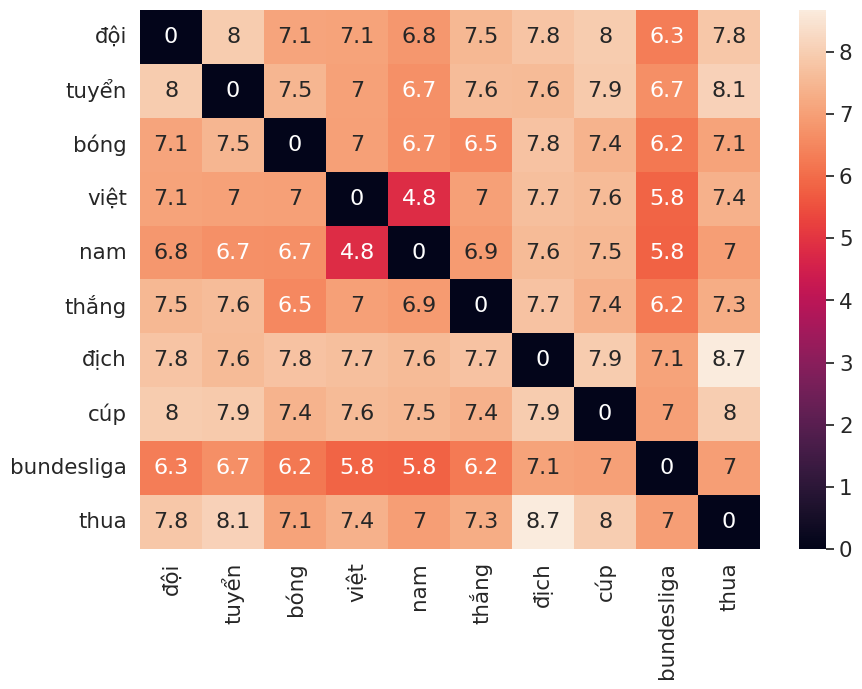

In [56]:
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

list_words = ["đội", "tuyển", "bóng", "việt", "nam", "thắng", "địch", "cúp", "bundesliga", "thua"]
list_word_embs = list(map(lambda x: model[x], list_words))

dm = distance_matrix(list_word_embs, list_word_embs, p=2)

df_dm = pd.DataFrame(dm, list_words, list_words)
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_dm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
